In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [2]:
df1 = pd.read_csv("test_set.csv")
df2 = pd.read_csv("training_set_labels.csv")
df3 = pd.read_csv("training_set_values.csv")
df = pd.concat([df1,df2], axis = 1)

# Data Preprocessing

In [3]:
df1

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [4]:
df2

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [5]:
df3.shape

(14850, 40)

In [6]:
df1.wpt_name.isin(df.wpt_name)
df.wpt_name.nunique()

37400

In [7]:
df.info()
df
X = df.drop("status_group", axis = 1)
y = df.status_group

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [8]:
df.iloc[:, 0:10]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0
...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0


In [9]:
df.funder.value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Lizad                        1
Othod                        1
Wwf / Fores                  1
Kipo Potry                   1
Samweli Kitana               1
Name: funder, Length: 1897, dtype: int64

In [10]:
def add_tsh(df):
    
    df["tsh_0"] = (df["amount_tsh"] == 0).astype(int)
    return df
X.pipe(add_tsh)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,tsh_0
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,1
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,1
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,60739,0
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,27263,0
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,37057,1
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,31282,1


In [11]:
def gov_funding(df):

    df["gov_funding"] = (df.funder == "Government Of Tanzania").astype(int)
    return df
X.pipe(gov_funding)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,tsh_0,gov_funding
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,0,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,1,0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,0,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,1,0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,60739,0,0
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,27263,0,0
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,37057,1,0
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,31282,1,0


In [12]:
def installer(df):
    
    df.installer = df.installer.apply(lambda x: 0 if x == "DWE" or x=="Government" else 1)
    return df
X.pipe(installer)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,tsh_0,gov_funding
0,69572,6000.0,2011-03-14,Roman,1390,1,34.938093,-9.856322,none,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,0,0
1,8776,0.0,2013-03-06,Grumeti,1399,1,34.698766,-2.147466,Zahanati,0,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,1,0
2,34310,25.0,2013-02-25,Lottery Club,686,1,37.460664,-3.821329,Kwa Mahundi,0,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,0,0
3,67743,0.0,2013-01-28,Unicef,263,1,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,1,0
4,19728,0.0,2011-07-13,Action In A,0,1,31.130847,-1.825359,Shuleni,0,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,1,37.169807,-3.253847,Area Three Namba 27,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,60739,0,0
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,1,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,27263,0,0
59397,37057,0.0,2011-04-11,NaN,0,1,34.017087,-8.750434,Mashine,0,...,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,37057,1,0
59398,31282,0.0,2011-03-08,Malec,0,1,35.861315,-6.378573,Mshoro,0,...,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,31282,1,0


In [13]:
df.wpt_name.value_counts()

none          3563
Shuleni       1748
Zahanati       830
Msikitini      535
Kanisani       323
              ... 
Nchahuru         1
Senga 3          1
Kwa Mafwa        1
Kwa Mkon         1
Kwedibonde       1
Name: wpt_name, Length: 37400, dtype: int64

In [14]:
df.num_private.value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [15]:
df.gps_height.value_counts()[5:10]

 1290    52
-14      51
 303     51
-18      49
-19      47
Name: gps_height, dtype: int64

In [16]:
df.iloc[:, 10:20]

,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by
0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd
1,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd
2,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd
3,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd
4,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd
...,...,...,...,...,...,...,...,...,...,...
59395,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd
59396,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd
59397,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd
59398,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd


In [17]:
df.basin.value_counts()
df.basin.isna().sum()
features = ["basin", "tsh_0", "gov_funding", "installer"]

In [18]:
df.subvillage.value_counts()

Madukani      508
Shuleni       506
Majengo       502
Kati          373
Mtakuja       262
             ... 
Mangidi A       1
Nyasembe        1
Kaarage         1
Gwanumpu        1
Rubilizi A      1
Name: subvillage, Length: 19287, dtype: int64

In [19]:
#len(df.region.value_counts())
#final["region"] = df.region
features.append("region")

In [20]:
df.region_code.value_counts()
features.append("region_code")

In [21]:
X.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                  int64
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [22]:
len(df.district_code.value_counts())
#final["district_code"] = df.district_code
features.append("district_code")

In [23]:
df.lga.value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [24]:
df.ward.value_counts()

Igosi        307
Imalinyi     252
Siha Kati    232
Mdandu       231
Nduruma      217
            ... 
Kapilula       1
Simbay         1
Sungwisi       1
Matarawe       1
Kinungu        1
Name: ward, Length: 2092, dtype: int64

In [25]:
df.population.value_counts()
#final["population"] = df.population
features.append("population")

In [26]:
df.public_meeting.value_counts()
df.public_meeting.isna().sum()


3334

In [27]:
df.public_meeting

0        True
1         NaN
2        True
3        True
4        True
         ... 
59395    True
59396    True
59397    True
59398    True
59399    True
Name: public_meeting, Length: 59400, dtype: object

In [28]:
def public_fill(df):
    df["public_meeting"] = df["public_meeting"].fillna(False).astype(int)
    return df
#final["public_meeting"] = df.public_meeting.astype(int)
#final.isna().sum()
features.append("public_meeting")


In [29]:
df.iloc[:,10:20]

,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by
0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd
1,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd
2,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd
3,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd
4,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd
...,...,...,...,...,...,...,...,...,...,...
59395,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd
59396,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd
59397,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd
59398,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd


In [30]:
df.public_meeting.isna().any()

True

In [31]:
df.scheme_management.value_counts()
#final["scheme_management"] = df.scheme_management
#final = final[final.scheme_management != "None"]
features.append("scheme_management")

In [32]:
#final.scheme_management.value_counts()

In [33]:
df.permit.value_counts()
df.permit.isna().sum()

3056

In [34]:
def permit_fill(df):
    df["permit"] = df["permit"].fillna(False).astype(int)
    return df
#final["permit"] = df.permit
features.append("permit")

In [35]:
df.construction_year
#final["construction_year"] = df.construction_year
features.append("construction_year")

In [36]:
df.extraction_type.value_counts()
#final["extraction_type"] = df.extraction_type
#final = final[final.extraction_type != "other - mkulima/shinyanga"]
features.append("extraction_type")

In [37]:
#final.extraction_type.value_counts()

In [38]:
df.management.value_counts()
#final["management"] = df.management
features.append("management")

In [39]:
df.management_group.value_counts()
#final["management_group"] = df.management_group
features.append("management_group")

In [40]:
df.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [41]:
df.payment.value_counts()
#final["payment"] = df.payment
features.append("payment")


In [42]:
df.payment

0                 pay annually
1                    never pay
2               pay per bucket
3                    never pay
4                    never pay
                 ...          
59395           pay per bucket
59396             pay annually
59397              pay monthly
59398                never pay
59399    pay when scheme fails
Name: payment, Length: 59400, dtype: object

In [43]:
df.iloc[:, 30:40]

,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...
59395,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [44]:
df.water_quality.value_counts()
#final["water_quality"] = df.water_quality
features.append("water_quality")

In [45]:
df.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [46]:
#final["waterpoint_type"] = df.waterpoint_type
features.append("waterpoint_type")
df.waterpoint_type.value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [47]:
df.quality_group.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [48]:
df.quantity.value_counts()
#final["quantity"] = df.quantity
features.append("quantity")

In [49]:
df.source.value_counts()
#final["source"] = df.source
features.append("source")

In [50]:
#final["source_class"] = df.source_class
features.append("source_class")

In [51]:
def filt(df, feature_list):
    return df[feature_list]
features.append("payment")
features

['basin',
 'tsh_0',
 'gov_funding',
 'installer',
 'region',
 'region_code',
 'district_code',
 'population',
 'public_meeting',
 'scheme_management',
 'permit',
 'construction_year',
 'extraction_type',
 'management',
 'management_group',
 'payment',
 'water_quality',
 'waterpoint_type',
 'quantity',
 'source',
 'source_class',
 'payment']

In [52]:
def dummies(df):
    return pd.get_dummies(df)
    
    

In [53]:
#features.append("gov_funding")
#features.append("source_class")
#features.append("region_code")
features = set(features)
#features.add("waterpoint_type")
features.add("gps_height")
features

{'basin',
 'construction_year',
 'district_code',
 'extraction_type',
 'gov_funding',
 'gps_height',
 'installer',
 'management',
 'management_group',
 'payment',
 'permit',
 'population',
 'public_meeting',
 'quantity',
 'region',
 'region_code',
 'scheme_management',
 'source',
 'source_class',
 'tsh_0',
 'water_quality',
 'waterpoint_type'}

# Transforming Train and Test Set Using Pipe Function

In [54]:
X_final = X.pipe(add_tsh).pipe(gov_funding).pipe(installer).pipe(public_fill).pipe(permit_fill).pipe(filt, feature_list = features).pipe(dummies)
X_final

,tsh_0,installer,district_code,gov_funding,population,construction_year,public_meeting,gps_height,region_code,permit,...,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug
0,0,1,5,0,109,1999,1,1390,11,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,2,0,280,2010,0,1399,20,1,...,0,0,0,0,0,0,0,0,0,1
2,0,1,4,0,250,2009,1,686,21,1,...,0,0,0,0,0,1,0,0,0,0
3,1,1,63,0,58,1986,1,263,90,1,...,0,0,0,0,0,1,0,0,0,0
4,1,1,1,0,0,0,1,0,18,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,0,1,5,0,125,1999,1,1210,3,1,...,0,0,0,0,0,0,0,1,0,0
59396,0,1,4,0,56,1996,1,1212,11,1,...,0,0,0,0,0,1,0,0,0,0
59397,1,1,7,0,0,0,1,0,12,0,...,0,0,0,0,0,1,0,0,0,0
59398,1,1,4,0,0,0,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0


In [55]:
X_test2 = df3.pipe(add_tsh).pipe(gov_funding).pipe(installer).pipe(public_fill).pipe(permit_fill).pipe(filt, feature_list = features).pipe(dummies)
X_test2

,tsh_0,installer,district_code,gov_funding,population,construction_year,public_meeting,gps_height,region_code,permit,...,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug
0,1,1,3,0,321,2012,1,1996,21,1,...,0,1,0,0,0,0,0,0,0,0
1,1,0,2,1,300,2000,1,1569,2,1,...,0,0,0,0,0,1,0,0,0,0
2,1,1,2,0,500,2010,1,1567,13,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,43,0,250,1987,0,267,80,1,...,0,0,0,0,0,1,0,0,0,0
4,0,1,3,0,60,2000,0,1260,10,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,1,1,1,0,20,1988,1,34,6,1,...,0,0,0,0,0,1,0,0,0,0
14846,0,1,7,0,2960,1994,1,0,4,0,...,0,0,0,0,0,1,0,0,0,0
14847,1,1,2,0,200,2010,1,1476,13,0,...,0,0,0,0,0,1,0,0,0,0
14848,1,0,2,0,150,2009,1,998,10,1,...,0,0,0,0,0,1,0,0,0,0


In [56]:
X_train2, X_test2 = X_final.align(X_test2, join = "left", fill_value = 0, axis = 1)

In [57]:
X_train2.shape, X_test2.shape

((59400, 127), (14850, 127))

In [58]:
(X_train2.index == y.index).all()

True

In [59]:
features

{'basin',
 'construction_year',
 'district_code',
 'extraction_type',
 'gov_funding',
 'gps_height',
 'installer',
 'management',
 'management_group',
 'payment',
 'permit',
 'population',
 'public_meeting',
 'quantity',
 'region',
 'region_code',
 'scheme_management',
 'source',
 'source_class',
 'tsh_0',
 'water_quality',
 'waterpoint_type'}

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train2, y, test_size=0.25)

X_train2
X_test
df3

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,tsh_0,gov_funding
0,50785,0.0,2013-02-04,Dmdd,1996,1,35.290799,-4.059696,Dinamu Secondary School,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,1,0
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,0,36.656709,-3.309214,Kimnyak,0,...,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,1,1
2,17168,0.0,2013-02-01,NaN,1567,1,34.767863,-5.004344,Puma Secondary,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,1,0
3,45559,0.0,2013-01-22,Finn Water,267,1,38.058046,-9.418672,Kwa Mzee Pange,0,...,good,dry,dry,shallow well,shallow well,groundwater,other,other,1,0
4,49871,500.0,2013-03-27,Bruder,1260,1,35.006123,-10.950412,Kwa Mzee Turuka,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,1,38.852669,-6.582841,Kwambwezi,0,...,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,1,0
14846,18990,1000.0,2011-03-21,Hiap,0,1,37.451633,-5.350428,Bonde La Mkondoa,0,...,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,0,0
14847,28749,0.0,2013-03-04,NaN,1476,1,34.739804,-4.585587,Bwawani,0,...,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe,1,0
14848,33492,0.0,2013-02-18,Germany,998,0,35.432732,-10.584159,Kwa John,0,...,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,1,0


In [61]:
df.gps_height.value_counts()
features

{'basin',
 'construction_year',
 'district_code',
 'extraction_type',
 'gov_funding',
 'gps_height',
 'installer',
 'management',
 'management_group',
 'payment',
 'permit',
 'population',
 'public_meeting',
 'quantity',
 'region',
 'region_code',
 'scheme_management',
 'source',
 'source_class',
 'tsh_0',
 'water_quality',
 'waterpoint_type'}

In [63]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
forest = RandomForestClassifier()
rf_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3 ,6]
}

rf_grid_search = GridSearchCV(forest, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 6, 10],
                         'min_samples_leaf': [1, 3, 6],
                         'min_samples_split': [2, 5, 10]})

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion = 'entropy',
 max_depth = None,
 min_samples_leaf = 1,
 min_samples_split = 10)

rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.7961616161616162

# Note - Says 0 of 3 Subs Made because no subs were made that day

<img src="results">

In [65]:
from sklearn.metrics import confusion_matrix
preds = rf_model.predict(X_test)
confusion_matrix(y_test, preds)

array([[7269,  118,  720],
       [ 604,  277,  171],
       [1353,   61, 4277]])

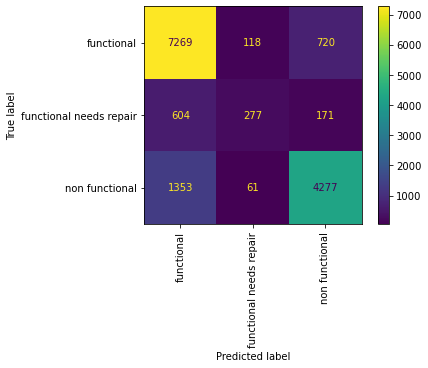

In [68]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_model, X_test, y_test, xticks_rotation='vertical');

In [144]:
predicts = rf_model.predict(X_test2)
kaggle = pd.concat([df3.id, pd.Series(predicts)], axis = 1)
kaggle = kaggle.rename({0 : "status_group"}, axis = 1)
kaggle
kaggle.to_csv("new.csv", index=False)

# GridSearch CV w XGB took 4 hours, below are the best parameters found

In [146]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = xgb.XGBClassifier(max_depth = 7, min_child_weight = 10, n_jobs = 1)
model.fit(scaler.fit_transform(X_train), y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:47:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [147]:
model.score(scaler.transform(X_test), y_test)

0.7887542087542088

# Other Model Trials

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(
    final2, target, test_size=0.25, random_state=13)

In [52]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)

AdaBoostClassifier()

In [53]:
clf.score(X_test, y_test)

0.7187205387205388

In [58]:
clf = AdaBoostClassifier()
param_grid = {
    "n_estimators" : [100,200],
    "learning_rate" : [.001, .01, .1, .2, .5]
}

ada_grid_search = GridSearchCV(clf, param_grid, cv=3, return_train_score=True)

ada_grid_search.fit(X_train, y_train)


#training_preds = clf.predict(X_train)
#val_preds = clf.predict(X_test)
#training_accuracy = accuracy_score(y_train, training_preds)
#val_accuracy = accuracy_score(y_test, val_preds)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
                         'n_estimators': [100, 200]},
             return_train_score=True)

In [60]:
ada_grid_search.score(X_test, y_test)

0.7321212121212122

In [54]:
from sklearn.preprocessing import StandardScaler
gbt_clf = GradientBoostingClassifier()
gbt_clf.fit(X_train, y_train)
gbt_clf.score(X_test,y_test)

0.7485521885521885

In [55]:
gbt_clf.score(X_train, y_train)

0.7479291534783488

In [63]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)
dt_grid_search.fit(X_train, y_train)

dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

In [64]:
dt_grid_search.best_score_

0.7571492704826038

In [58]:
rf_model.score(X_test, y_test)

0.7906397306397306

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=100)
bagged_tree.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=100)

In [71]:
bagged_tree.score(X_test, y_test)

0.7025589225589226

In [60]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [68]:
model = XGBClassifier(max_depth = 7, min_child_weight = 10, n_jobs = 1)
model.fit(scaler.fit_transform(X_train), y_train)


[10:00:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
model.score(scaler.transform(X_test), y_test)

0.7864646464646464